# Airbnb-Price-Predictions-Florida Edition

## Summary
This notebook presents an exploratory data analysis (EDA) of Airbnb listings in Florida. The dataset used in this analysis contains information about various properties listed on Airbnb, including their location, amenities, pricing, and host details. The purpose of this analysis is to gain insights into the dataset and uncover patterns and trends related to the Airbnb listings in Florida.

---

## Overview of the Dataset
The dataset consists of several columns that provide information about each Airbnb listing. Some of the key columns include:
- `id`: Unique identifier for each listing.
- `name`: The name or title of the listing.
- `description`: A description of the property.
- `neighbourhood`: The neighbourhood where the property is located.
- `room_type`: The type of room or property (e.g., entire home, private room, shared room).
- `price`: The price per night for the listing.
- `amenities`: A list of amenities available at the property.

By performing exploratory data analysis on this dataset, we aim to understand the distribution of Airbnb listings across different neighbourhoods, explore the relationship between various numeric variables such as price and the number of bedrooms, and identify the top amenities offered by Airbnb hosts in Florida.

---


# Table of Contents

1. [Imports](#Imports)
2. [Data Cleaning](#Data-Cleaning)
3. [Histogram of Numeric Columns](#Histogram-of-Numeric-Columns)
4. [Correlation Heatmap of Numeric Columns](#Correlation-Heatmap-of-Numeric-Columns)
5. [Pairplot of Numeric Columns](#Pairplot-of-Numeric-Columns)
6. [Top Amenities](#Top-Amenities)
7. [Room Type Distribution](#Room-Type-Distribution)
8. [Neighbourhood Distribution](#Neighbourhood-Distribution)

---

## Imports

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [75]:
listings = pd.read_csv('../data/listings-3.csv')

In [76]:
# Displaying the first few rows of the dataset
listings.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,827736378366911479,https://www.airbnb.com/rooms/827736378366911479,20230327145536,2023-03-27,city scrape,Legion 1BR/1BA,Take it easy at this unique and tranquil getaway.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,475630606,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
1,592589963829194972,https://www.airbnb.com/rooms/592589963829194972,20230327145536,2023-03-28,city scrape,Club Wyndham Royal Vista,"Located directly on the beach, the property si...",NaN,https://a0.muscache.com/pictures/8a429c15-ea50...,66506549,...,NaN,NaN,NaN,NaN,f,5,0,5,0,NaN


In [77]:
# Checking the shape of the dataset
listings.shape

(16899, 75)

In [78]:
# Descriptive statistics of the dataset
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.689900e+04,1.689900e+04,1.689900e+04,16898.000000,16898.000000,0.0,16899.000000,16899.000000,16899.000000,0.0,...,14023.000000,14023.000000,14023.000000,14023.000000,0.0,16899.000000,16899.000000,16899.000000,16899.000000,14062.000000
mean,3.334714e+17,2.023033e+13,2.003555e+08,74.536336,110.687833,NaN,26.103429,-80.145142,5.169477,NaN,...,4.793568,4.791792,4.779039,4.641546,NaN,18.621398,17.481508,1.024558,0.098171,1.665793
std,3.612008e+17,0.000000e+00,1.656271e+08,314.697442,498.317014,NaN,0.098679,0.055160,3.125862,NaN,...,0.423552,0.433436,0.370587,0.471551,NaN,40.525624,40.169195,3.864148,1.207154,1.553133
min,5.781800e+04,2.023033e+13,5.146000e+03,1.000000,1.000000,NaN,25.957323,-80.428120,0.000000,NaN,...,0.000000,1.000000,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,4.229006e+07,2.023033e+13,4.889588e+07,2.000000,2.000000,NaN,26.008728,-80.154830,3.000000,NaN,...,4.750000,4.760000,4.720000,4.530000,NaN,1.000000,1.000000,0.000000,0.000000,0.520000
50%,5.365582e+07,2.023033e+13,1.516411e+08,6.000000,8.000000,NaN,26.111060,-80.126690,4.000000,NaN,...,4.940000,4.930000,4.880000,4.760000,NaN,4.000000,3.000000,0.000000,0.000000,1.230000
75%,7.067344e+17,2.023033e+13,3.687955e+08,24.000000,34.000000,NaN,26.172690,-80.116367,6.000000,NaN,...,5.000000,5.000000,5.000000,4.920000,NaN,17.000000,14.000000,0.000000,0.000000,2.380000
max,8.559792e+17,2.023033e+13,5.067595e+08,4809.000000,8427.000000,NaN,26.333410,-80.075020,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,NaN,259.000000,258.000000,39.000000,22.000000,30.150000


In [79]:
# Information about the dataset including missing values
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16899 entries, 0 to 16898
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            16899 non-null  int64  
 1   listing_url                                   16899 non-null  object 
 2   scrape_id                                     16899 non-null  int64  
 3   last_scraped                                  16899 non-null  object 
 4   source                                        16899 non-null  object 
 5   name                                          16898 non-null  object 
 6   description                                   16673 non-null  object 
 7   neighborhood_overview                         10460 non-null  object 
 8   picture_url                                   16899 non-null  object 
 9   host_id                                       16899 non-null 

In [80]:
# Set the "id" column as the index
listings.set_index('id', inplace=True)

**Setting the "id" column as the index in the Airbnb data for Broward County enables direct access and retrieval of specific listings based on their unique "id" values**

In [81]:
relevant_host_variables = ['host_listings_count', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_since']

host_data = listings[relevant_host_variables]

# Print the first few rows of the host-related variables
host_data.head()

,host_listings_count,host_response_rate,host_acceptance_rate,host_is_superhost,host_since
id,,,,,
827736378366911479,2.0,100%,94%,f,2022-08-18
592589963829194972,97.0,98%,16%,f,2016-04-09
772438920837360569,3.0,100%,89%,t,2020-12-30
33271346,3.0,100%,100%,f,2017-03-02
484515,10.0,95%,26%,f,2011-05-28


**The host-related variables in the Broward County Airbnb market provide valuable information for comprehending the characteristics and behaviors of hosts. By analyzing these variables, patterns can be identified, the relationship between hosts and pricing decisions can be explored, and insights into host activity and reputation can be gained**

In [82]:
host_data = listings[['host_since']].copy()

In [83]:
# Convert host_since to datetime
host_data['host_since'] = pd.to_datetime(host_data['host_since'])

In [84]:
# Group by year and count the number of hosts
host_registrations = host_data['host_since'].dt.year.value_counts().sort_index()

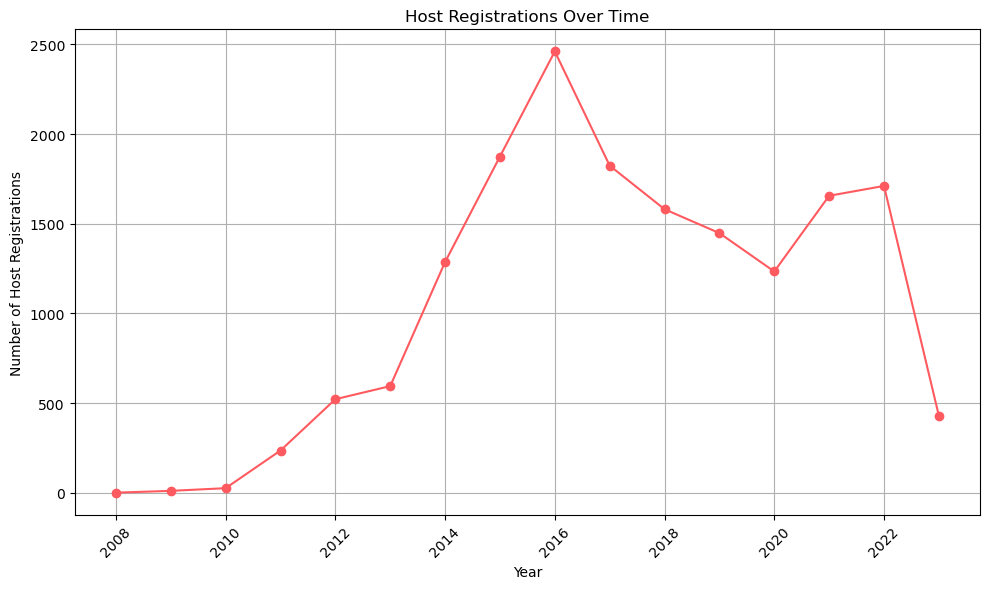

In [85]:
airbnb_colors = ['#FF5A5F', '#FFB400', '#007A87', '#00A699']

# Line plot
plt.figure(figsize=(10, 6))
plt.plot(host_registrations.index, host_registrations.values, marker='o', color=airbnb_colors[0])
plt.xlabel('Year')
plt.ylabel('Number of Host Registrations')
plt.title('Host Registrations Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('../charts//Host_Registrations.png')
plt.show()

**The decline in host registrations observed in the line plot starting from 2020 may be attributed to various factors. One possible reason could be the impact of the COVID-19 pandemic, which significantly affected the travel and hospitality industry. Travel restrictions, lockdowns, and reduced demand for accommodations during the pandemic might have discouraged new hosts from registering on the Airbnb platform**.

**Additionally, the initial peak in host registrations around 2016 might be indicative of an earlier phase of Airbnb's growth in Broward County. During this period, there may have been increased interest and adoption of the platform by new hosts, leading to a surge in host registrations**.





## Data Cleaning

In [86]:
# Removing non-numeric characters and converting 'price' column to float
listings['price'] = listings['price'].apply(lambda x: float(''.join(filter(str.isdigit, str(x)))))

In [50]:
# Dropping columns that won't be useful for the price prediction
irrelevant_columns = ['listing_url', 'scrape_id', 'bathrooms', 'neighbourhood_group_cleansed',
                              'source', 'picture_url', 'host_id', 'host_url', 'host_about', 
                              'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 
                              'calendar_last_scraped', 'license', 
                              'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
                              'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms']

**The columns that are disregarded are the ones that have unique identifiers, redundant information, or require complex processing to extract useful features. For example, identifiers like URLs or ID numbers don't contribute to predicting outcomes. Similarly, columns with redundant data or information that can be better represented in another column, like 'bathrooms' and 'bathrooms_text', are left out to avoid duplication**.

**Additionally, columns that contain free-text or qualitative data, such as 'host_about', are not considered initially because it's challenging to transform this type of information into predictive features. In the initial stages, the focus is on columns that contain easily usable, quantitative information.Some columns provide meaningful information about the host or listing but may not directly influence pricing**

In [51]:
# Handling missing values
listings_cleaned = listings.drop(columns=irrelevant_columns).fillna({
    'name': 'Unnamed',
    'description': 'No description available',
    'neighborhood_overview': 'No description available',
    'host_name': 'Unnamed',
    'host_location': 'No location',
})

In [52]:
# Drop missing values in the 'last_review' and 'neighbourhood' column
listings_cleaned.dropna(subset=['last_review', 'neighbourhood'], inplace=True)

In [53]:
# Saving the cleaned dataset as a CSV file
listings_cleaned.to_csv('../data/cleaned_listings.csv', index=False)

## Histogram of Numeric Columns

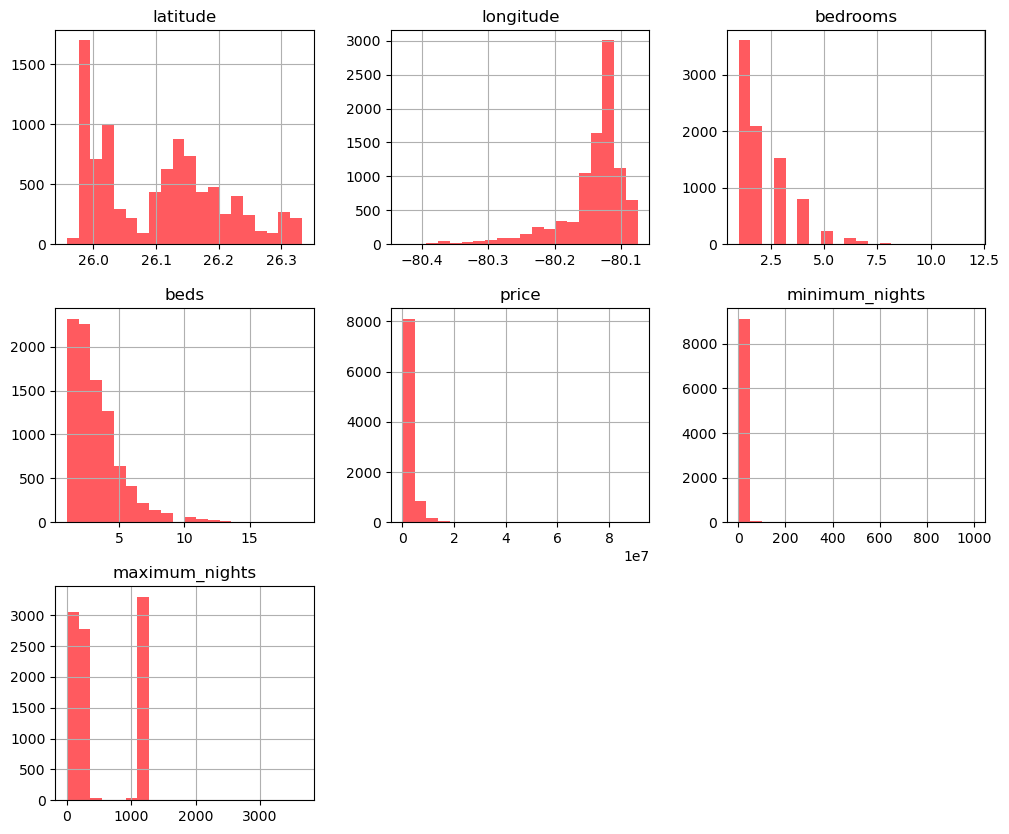

In [54]:
airbnb_colors = ["#FF5A5F", "#FF3839", "#484848", "#767676"]

numeric_columns = ['latitude', 'longitude', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights']
listings_cleaned[numeric_columns].hist(bins=20, figsize=(12, 10), color=airbnb_colors[0])
plt.show()

## Correlation Heatmap of Numeric Columns

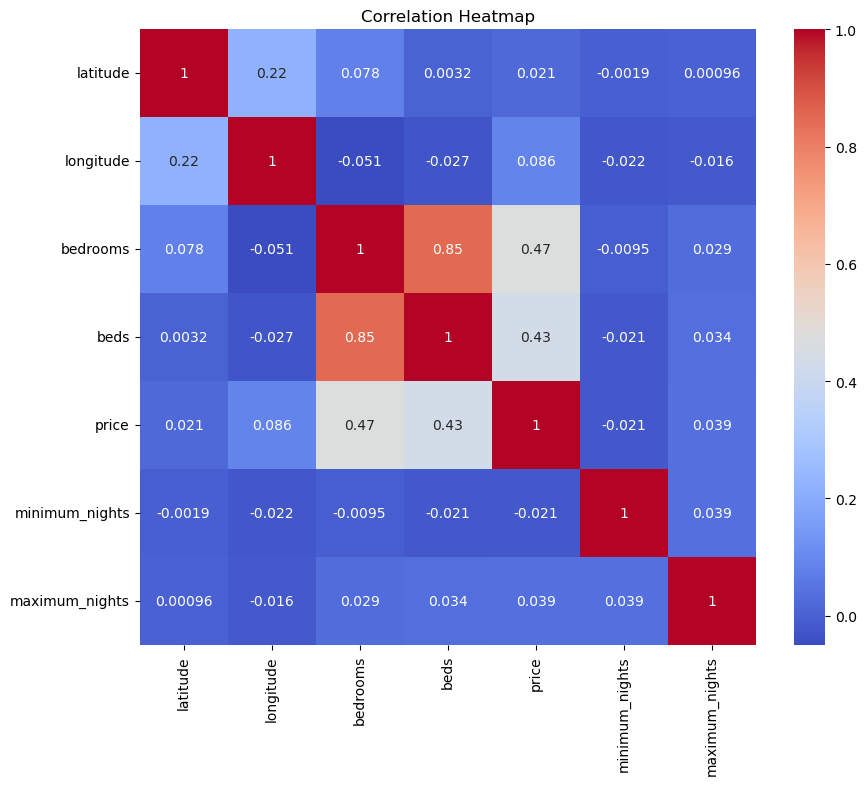

In [55]:
correlation_matrix = listings_cleaned[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

**The correlation heatmap demonstrates a strong correlation between the "price" variable and the variables "beds" and "bedrooms". This suggests that the number of beds and bedrooms could play a crucial role in predicting or modeling the price of Airbnb listings. Incorporating these amenities into the modeling process has the potential to capture their impact on pricing and enhance the accuracy of the model**.

## Pairplot of Numeric Columns

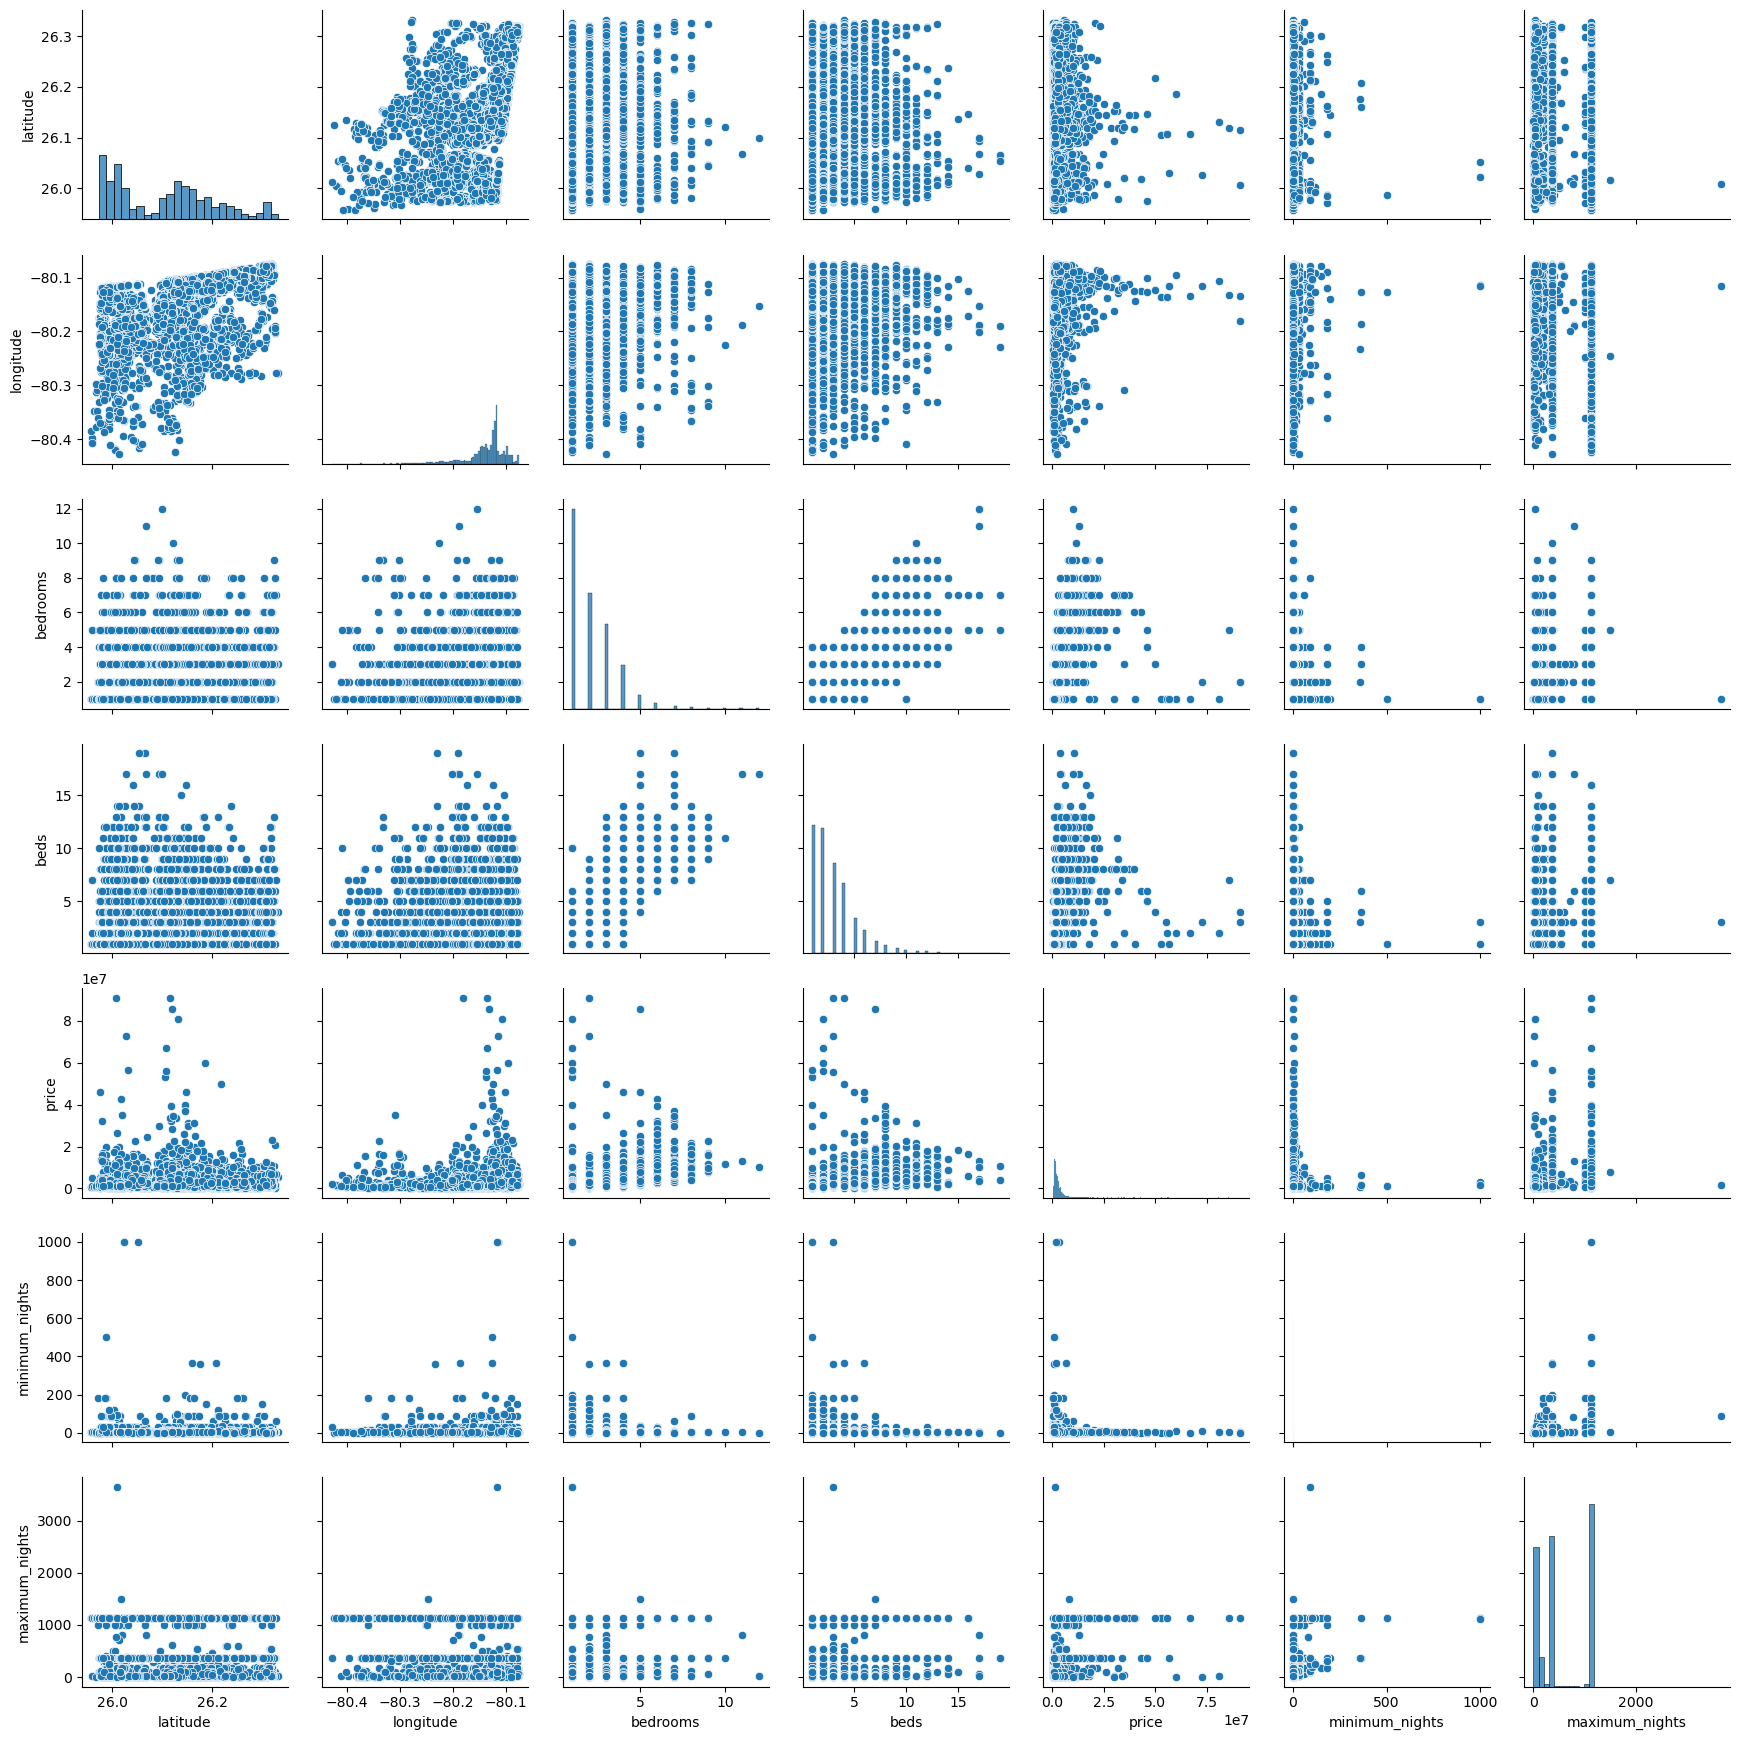

In [56]:
sns.pairplot(listings_cleaned[numeric_columns])
plt.tight_layout()
plt.show()


## Top Amenities

In [64]:
# Combining all amenities into a single string
combined_amenities = ' '.join(amenities_column)

# Split the combined string 
all_amenities = combined_amenities.replace('"', '').split(',')

# Count the occurrences of each amenity
amenity_frequency = Counter(all_amenities)


In [65]:
# Top number of amenities
number = 10
top_amenities = amenity_frequency.most_common(number)

# Extracting the amenities and their frequencies
amenities, frequencies = zip(*top_amenities)

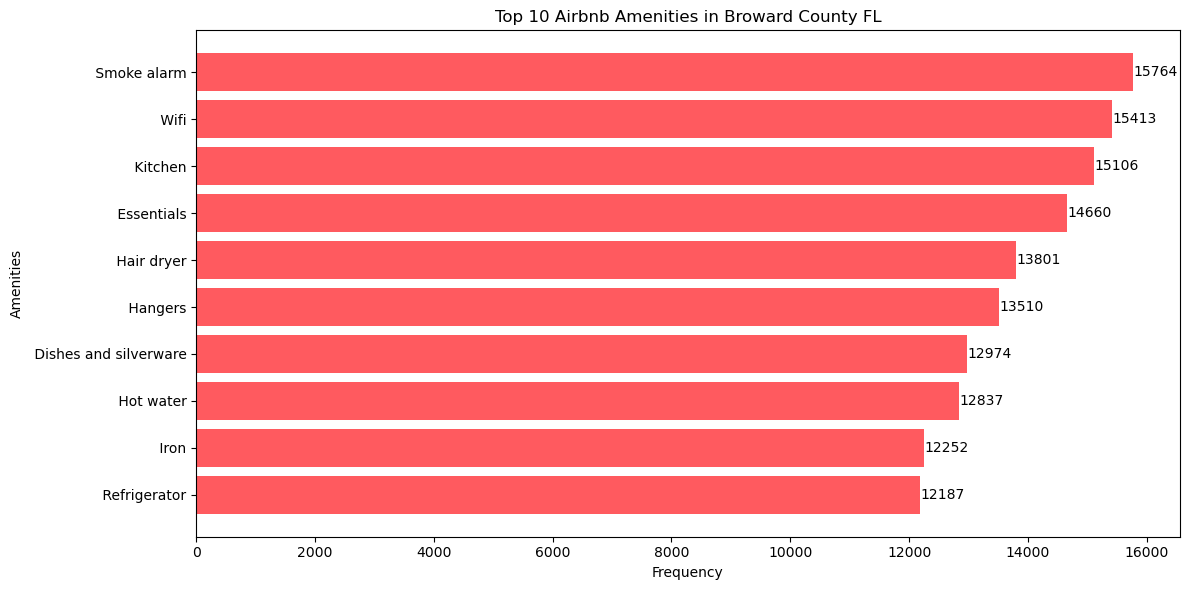

In [71]:
# Plot the bar chart
plt.figure(figsize=(12, 6))
bars = plt.barh(amenities, frequencies, color='#FF5A5F')
plt.xlabel('Frequency')
plt.ylabel('Amenities')
plt.title('Top 10 Airbnb Amenities in Broward County FL')
plt.gca().invert_yaxis()

# Add value labels to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2, str(width), ha='left', va='center')
    
plt.tight_layout()
plt.savefig('../charts/top_amenities.png')
plt.show()


**By understanding the amenities that are in high demand, hosts can align their offerings with guest preferences, thereby increasing the appeal and competitiveness of their listings in the Broward County market**.

## Room Type Distribution

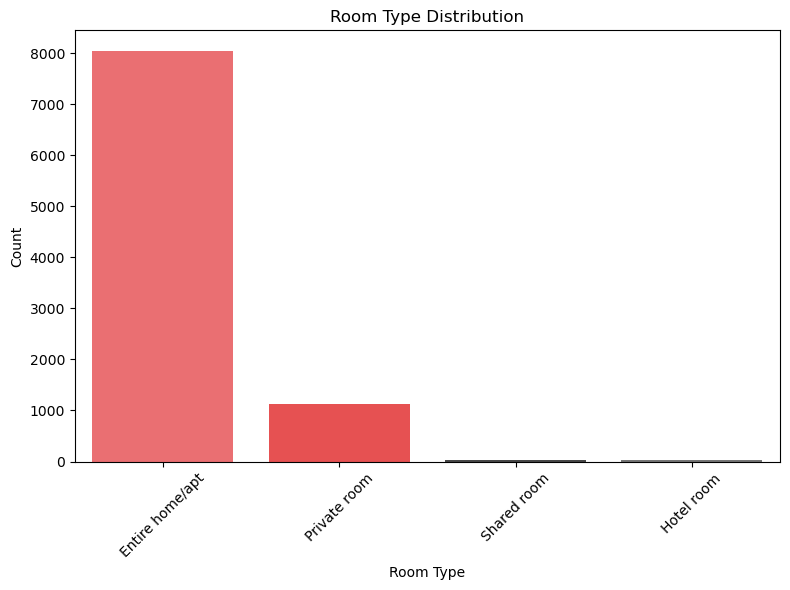

In [28]:
airbnb_colors = ["#FF5A5F", "#FF3839", "#484848", "#767676"]

room_type_counts = listings_cleaned['room_type'].value_counts()
plt.figure(figsize=(8, 6))
sns.countplot(x='room_type', data=listings_cleaned, order=room_type_counts.index, palette=airbnb_colors)
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../charts/room_type_distribution.png')
plt.show()

**The room type distribution, with "Entire home/Apartment" being the most prevalent and "Private room" as the second highest, offers valuable insights into the popularity and demand for different room types. Hosts can leverage this information to align their pricing strategies with the market dynamics, optimizing their revenue potential and attracting the appropriate target audience. Additionally, the room type distribution provides insights into the price range associated with each type, enabling hosts to set competitive prices and cater to the expectations and budgets of potential guests**.

## Neighbourhood Distribution

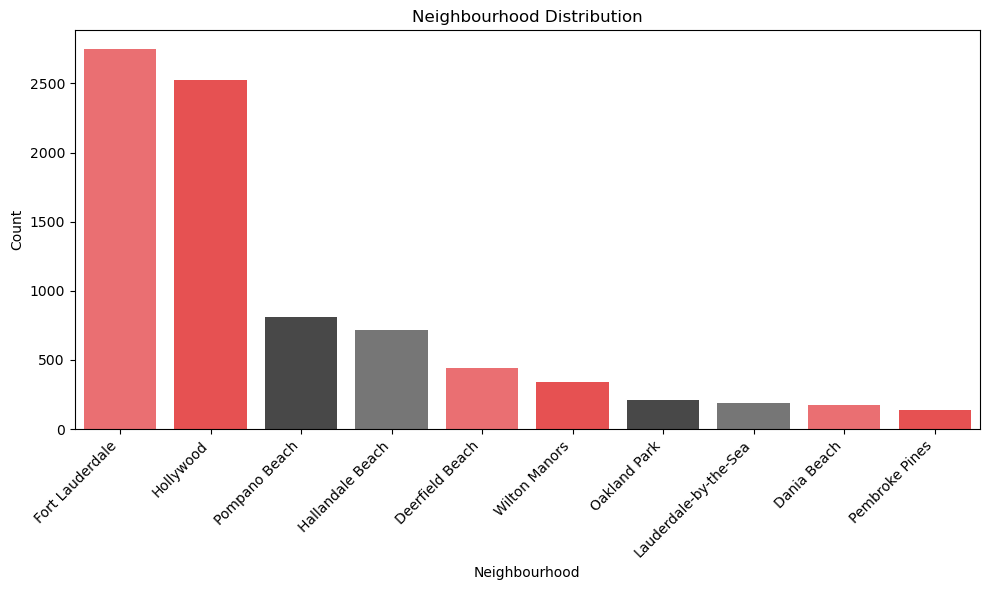

In [29]:
airbnb_colors = ["#FF5A5F", "#FF3839", "#484848", "#767676"]

neighbourhood_counts = listings_cleaned['neighbourhood'].value_counts().head(10)
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='neighbourhood', data=listings_cleaned, order=neighbourhood_counts.index, palette=airbnb_colors)
plt.title('Neighbourhood Distribution')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Modify x tick labels
x_tick_labels = ax.get_xticklabels()
modified_labels = [label.get_text().replace(', Florida, United States', '') for label in x_tick_labels]
ax.set_xticklabels(modified_labels, rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../charts/Neighbourhood_distribution.png')
plt.show()